In [ ]:
# This code is for our Plot2's recreation
# Based on 3 equations we had

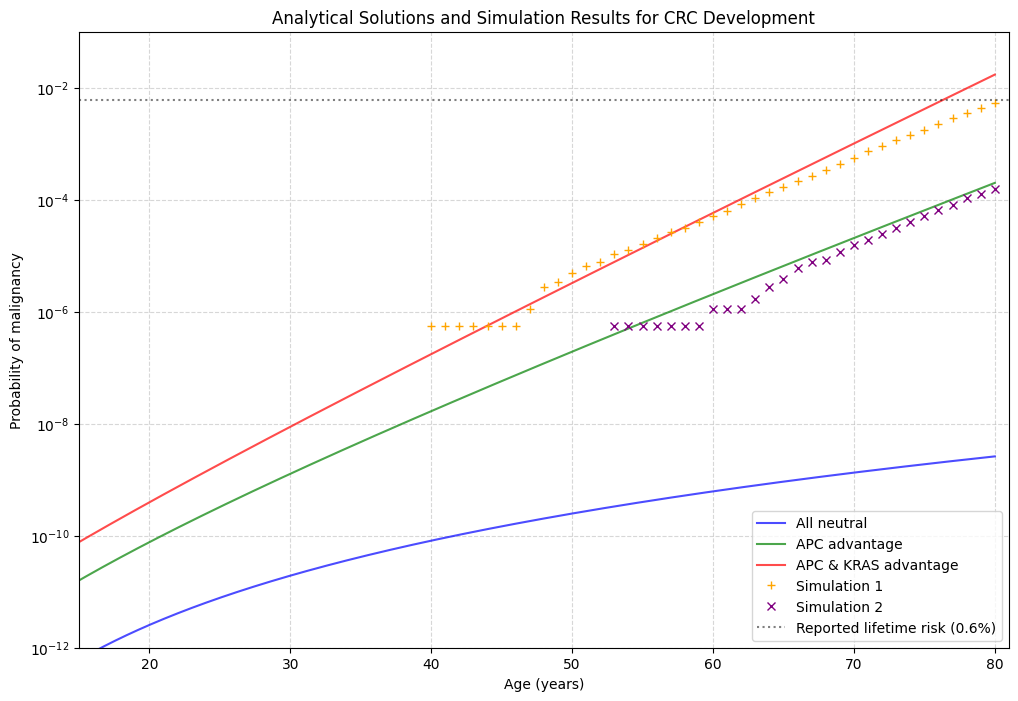

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Parameters:
    def __init__(self):
        # Base mutation rate per base pair per year
        self.u = 1.25e-8
        
        # Number of driver positions in each gene
        self.n_APC = 604
        self.n_TP53 = 73
        self.n_KRAS = 20
        
        # Mutation rates per year
        self.r_APC = self.n_APC * self.u
        self.r_TP53 = self.n_TP53 * self.u
        self.r_KRAS = self.n_KRAS * self.u
        self.r_LOH = 1.36e-4
        
        # Growth rates per year
        self.b_APC = 0.2    # APC-/- growth rate
        self.b_KRAS = 0.07  # KRAS+ growth rate
        self.b_BOTH = 0.27  # Combined APC-/-,KRAS+ growth rate
        
        # Initial number of crypts
        self.N_crypts = 10**8
        
        # Correction factors
        self.c1 = 5.88  # APC fixation advantage
        self.c2 = 3.6   # KRAS fixation advantage
        self.c = self.c1 * self.c2  # Combined correction

def neutral_solution(t, params):
    """Equation (1): All mutations are neutral"""
    P = (params.N_crypts * params.r_APC * params.r_TP53 * 
         params.r_KRAS * params.r_LOH**2 * t**5) / 4
    return P

def APC_advantage_solution(t, params):
    """Equation (2): Only APC provides growth advantage"""
    P = (3 * params.N_crypts * params.r_APC * params.r_TP53 * 
         params.r_KRAS * params.r_LOH**2 * t**2 * 
         np.exp(params.b_APC * t)) / (2 * params.b_APC**3)
    return P * params.c1

def both_advantage_solution(t, params):
    """Equation (3): Both APC and KRAS provide advantage"""
    b12 = params.b_BOTH
    b1 = params.b_APC
    b2 = params.b_KRAS
    
    P = (params.N_crypts * params.r_APC * params.r_TP53 * 
         params.r_KRAS * params.r_LOH**2 * t * np.exp(b12 * t) * 
         (1/(b12**3 * (b12 - b1)) + 1/(b12**3 * (b12 - b2)) + 
          1/(b12**2 * (b12 - b2)**2)))
    return P * params.c

def process_csv(file_name):
    """Read and process a CSV file to calculate cancer probabilities."""
    df = pd.read_csv(file_name, header=None)
    years = df[0]
    state_331 = df[38]  # (3,3,1) state
    state_341 = df[40]  # (3,4,1) state
    state_431 = df[48]  # (4,3,1) state
    state_441 = df[50]  # (4,4,1) state
    cancer_prob = state_331 + state_341 + state_431 + state_441
    return years, cancer_prob

def plot_analytical_and_simulation():
    params = Parameters()
    
    # Time points
    t = np.linspace(0, 80, 801)  # 0.1 year steps
    
    # Calculate analytical solutions
    P_neutral = neutral_solution(t, params)
    P_APC = APC_advantage_solution(t, params)
    P_both = both_advantage_solution(t, params)
    
    # Process CSV files
    years1, cancer_prob1 = process_csv('test1.1.csv')
    years2, cancer_prob2 = process_csv('test2.1.csv')
    
    # Plot
    plt.figure(figsize=(12, 8))
    
    # Plot analytical solutions
    plt.semilogy(t, P_neutral, 'b', label='All neutral', alpha=0.7)
    plt.semilogy(t, P_APC, 'g', label='APC advantage', alpha=0.7)
    plt.semilogy(t, P_both, 'r', label='APC & KRAS advantage', alpha=0.7)
    
    # Plot simulation results
    plt.semilogy(years1, cancer_prob1, '+', label='Simulation 1', color='orange')
    plt.semilogy(years2, cancer_prob2, 'x', label='Simulation 2', color='purple')
    
    # Add reference line at 0.006 (0.6% lifetime risk)
    plt.axhline(y=0.006, color='k', linestyle=':', alpha=0.5, 
                label='Reported lifetime risk (0.6%)')
    
    # Formatting
    plt.xlabel('Age (years)')
    plt.ylabel('Probability of malignancy')
    plt.title('Analytical Solutions and Simulation Results for CRC Development')
    plt.grid(True, which="both", ls="--", alpha=0.5)
    plt.legend()
    
    # Set y-axis limits similar to paper
    plt.ylim(1e-12, 1e-1)
    plt.xlim(15, 81)
    
    plt.savefig("analytical_and_simulation_results.pdf", format="pdf", bbox_inches="tight")
    plt.show()

if __name__ == "__main__":
    plot_analytical_and_simulation()
